<a href="https://colab.research.google.com/github/gatimo256/project2/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing
1) Source of data

- Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

2) Brief description of data
- The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

3) What is the target?
- The  goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

4) Is this a classification or regression problem?
- This is a classification Problem

5) How many features?
- 17 Features

6) How many rows of data.
- 4521

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- Cleaning
  - None
- Exploring
 - Correlation
 - Visualization 
- Preprocessing
  - Scaling
  - OneHotEncoding of Nominal Features

In [2]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#load dataset 1 Bank Marketing
path = 'https://drive.google.com/uc?export=download&id=1aMxQETdw7BnfMFLRAz4cmkTShyzzYy4m'
bank_df = pd.read_csv(path, delimiter =';')
bank_df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


Attribute Information:

Bank client data:

- Age (numeric)
- Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
- Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
- Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
- Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
- Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
- Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

- Contact: contact communication type (categorical:
'cellular','telephone')
- Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec')
- Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri')
- Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model.

- Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted)
- Previous: number of contacts performed before this campaign and for
this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')


Output variable (desired target):

- y - has the client subscribed a term deposit? (binary: 'yes', 'no')


In [5]:
#Check for duplicates
bank_df.duplicated().sum()

0

In [6]:
#check for missing values
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#check for the inconsitent values. 
cols = ['job', 'marital','education','loan','housing','contact','month','poutcome']
for n in cols:
    print(bank_df[n].value_counts().to_markdown())

|               |   job |
|:--------------|------:|
| management    |   969 |
| blue-collar   |   946 |
| technician    |   768 |
| admin.        |   478 |
| services      |   417 |
| retired       |   230 |
| self-employed |   183 |
| entrepreneur  |   168 |
| unemployed    |   128 |
| housemaid     |   112 |
| student       |    84 |
| unknown       |    38 |
|          |   marital |
|:---------|----------:|
| married  |      2797 |
| single   |      1196 |
| divorced |       528 |
|           |   education |
|:----------|------------:|
| secondary |        2306 |
| tertiary  |        1350 |
| primary   |         678 |
| unknown   |         187 |
|     |   loan |
|:----|-------:|
| no  |   3830 |
| yes |    691 |
|     |   housing |
|:----|----------:|
| yes |      2559 |
| no  |      1962 |
|           |   contact |
|:----------|----------:|
| cellular  |      2896 |
| unknown   |      1324 |
| telephone |       301 |
|     |   month |
|:----|--------:|
| may |    1398 |
| jul |    

From the results above, there are number of 'unknown' values in the following columns:
- job
- education
- contact
- poutcome

For exploratory puposes, we will not do anything to these values. We might however drop or impute them later when we build our model. 

# Exploration

In [8]:
#description of all the numerical categories/features in our dataset.
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


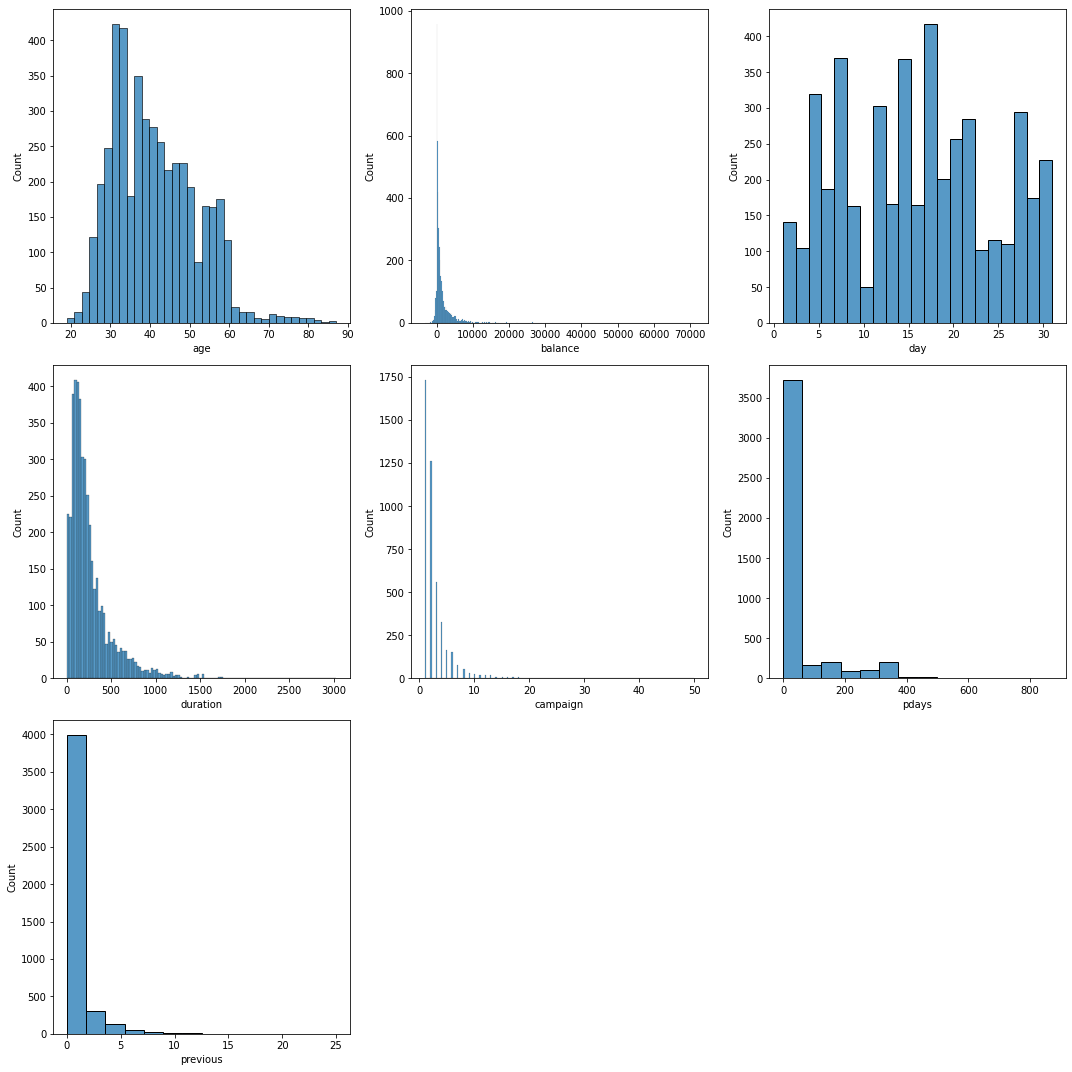

In [9]:
#create visualization for all the Numerical Columns.
#source code https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f
cols = 3
rows = 3

#select only the numerical
num_cols = bank_df.select_dtypes(include='number').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = bank_df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

From the Visualizations above we can make the following observations. 
1. Most Customers are between 25 and 45 years of age, with a few outliers above 80 years of age. 
2. For most customers, the number of contacts required to make a decision, was less than  5. 
3. Most customers have a balance of below 5000 USD

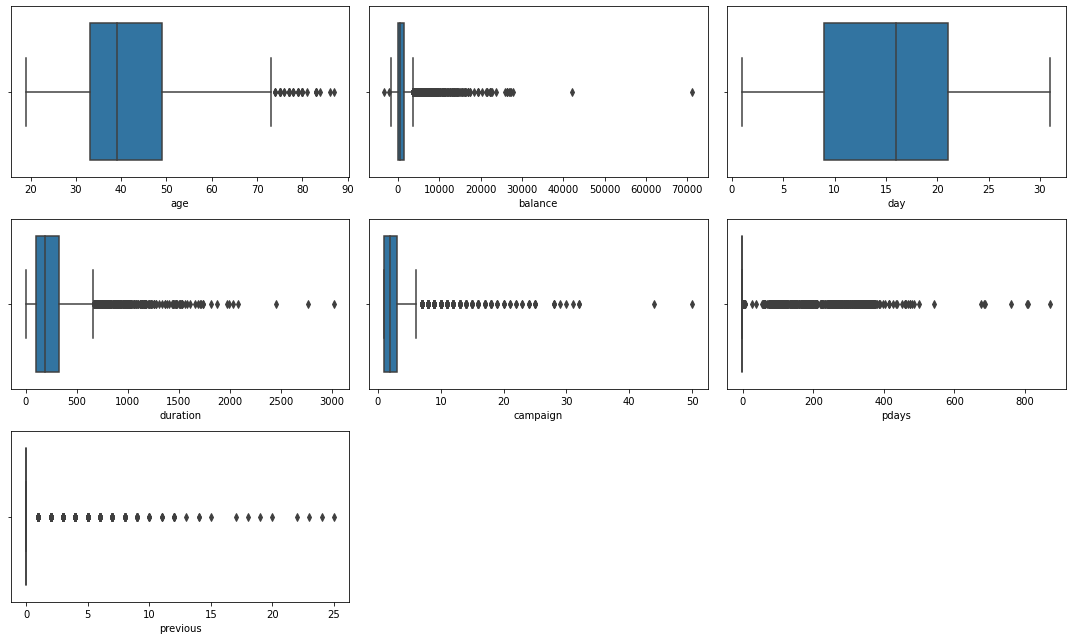

In [10]:
cols = 3
rows = 3
num_cols = bank_df.select_dtypes(include='number').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.boxplot(x=bank_df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

From the Box plots above we can make the following observations
- Most customers lie withing 35 to 50 years of Age. With a few outliers above 70 years. 
- Most Customers have a balance of below 5000 USD
- The duration of most calls is below 500 seconds to make a decision with outliers who needed a call duriatino of upto 2500 seconds and 3000 seconds. 
- The Campaigns box plot shows that most customers did not need mre than 5 contacts to make a decision. We however had a few outliers, some needing upto 50 contacts to make a decision. 
- Pdays and previous have too many unique values. 


**Categorical Features**

In [11]:
#lets get more inforation about our categorical Features including our target. 
bank_df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


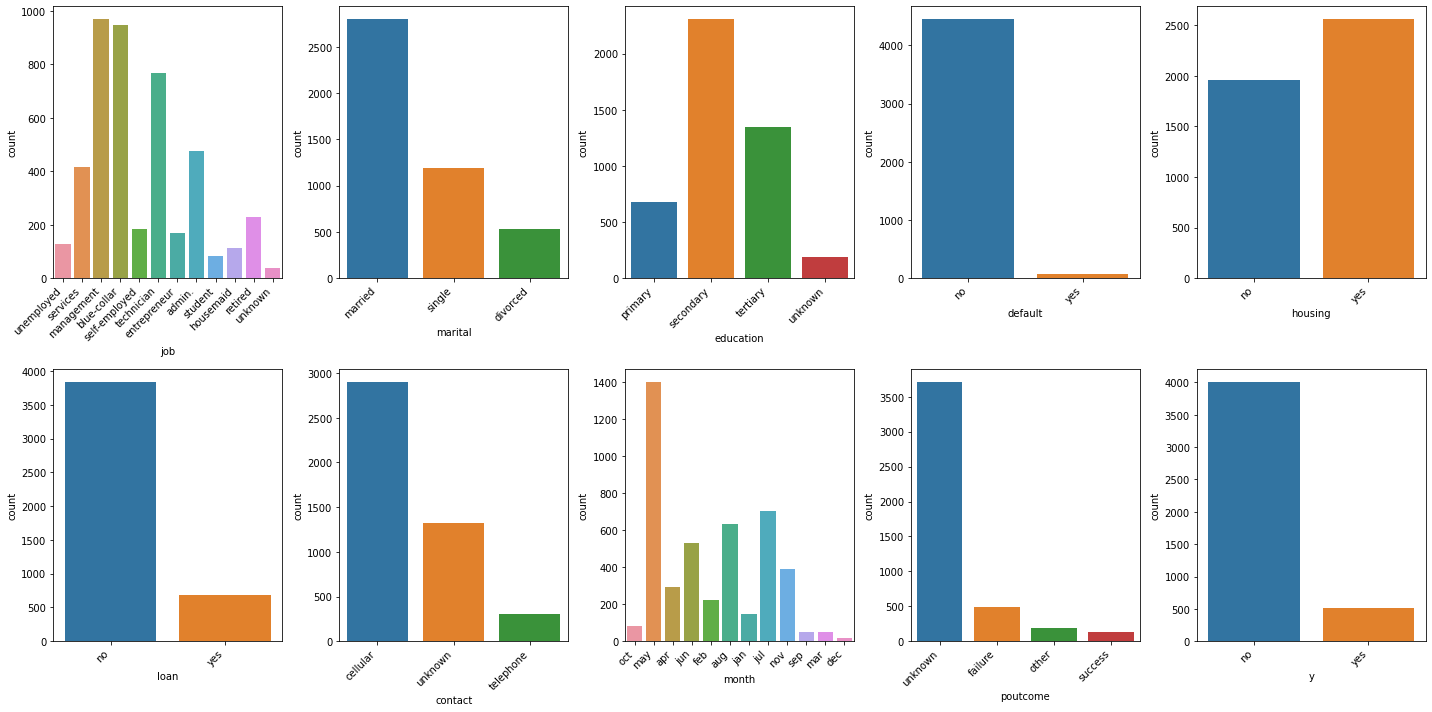

In [34]:
#lets visualize our categorical features
cols = 5
rows = 2
all_cats = bank_df.select_dtypes(include='object').columns
fig = plt.figure(figsize= (20,10))

for i, col in enumerate(all_cats):
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.countplot(x=bank_df[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

From our Visualization above we can make the following obserations
- The top 3 Jobs were Management, blue collar and technician
- Most of the bank customers are Married
- The most common level of educatio is Secondary
- Most customers have a housing loan with the bank. 
- Most customers do not default on their current loans. 
- Most of the customers also don't have personal loans.
- Most customer's contacts are by celluar.
- The most frequent contact month is May. 

Lets plot a pie charts for Marital Status, Contacts and education level of the bank customers.

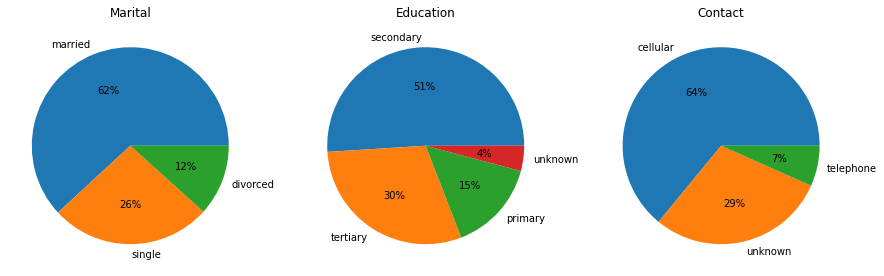

In [32]:
#get the value counts for each column. 
marital = bank_df['marital'].value_counts()
education = bank_df['education'].value_counts()
contact = bank_df['contact'].value_counts()

fig,ax = plt.subplots(1,3, figsize = (15,5))
ax[0].pie(marital, labels=marital.index,autopct="%.0f%%");
ax[1].pie(education, labels=education.index,autopct="%.0f%%");
ax[2].pie(contact, labels=contact.index,autopct="%.0f%%");

ax[0].set_title('Marital')
ax[1].set_title('Education')
ax[2].set_title('Contact')

plt.show()

From the above Visualizatio we can make the following observations.
- 62% of the customers are married, compared to 12% Divorced and 26% Single
- 51% of the customers had Secondary Education Level, compared to 30% Tertiary Level and 15% Primary Level
- 64% of the Customers used Cellular Contact compared to 7% Telephone and 29% Unknown.